# Kmeans vs. KNN Model for the digits dataset

#### By Zeena Ghulam 20197164 and Muna Isa 202002803



## Load the dataset

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

digits = datasets.load_digits()
X = digits.data
y = digits.target

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Create a DataFrame with the preprocessed features
df = pd.DataFrame(data=X_normalized, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["targets"] = y

# Print the information about the dimensions
print("Information about the Dimensions")
print(df.shape)
print(df["targets"].shape)
print(digits.images.shape)

Information about the Dimensions
(1797, 65)
(1797,)
(1797, 8, 8)


## Sample of the dataset

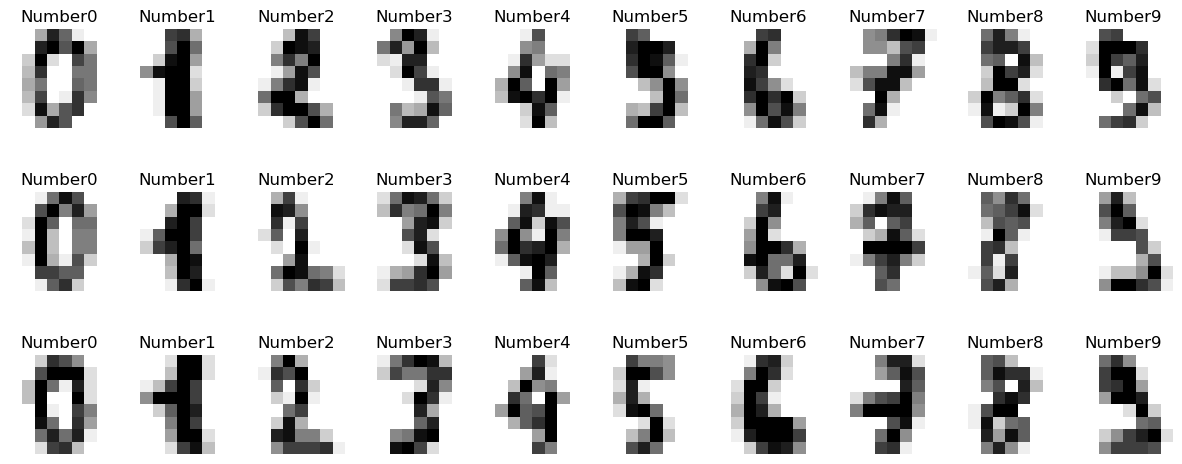

In [2]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(3,10, figsize = (15,6))

for ax,images, number in zip(axes.ravel(), digits.images, y):
    ax.axis('off')
    ax.imshow(images, cmap = plt.cm.gray_r)
    ax.set_title('Number' + str(number))

## Split the dataset

In [3]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99, stratify = y)

# print("Information about the Dimensions")
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [4]:
from sklearn.model_selection import train_test_split

# Preserve the last 15 records for future prediction
X_future = X[-15:]
y_future = y[-15:]

# Remove the last 15 records from the dataset
X = X[:-15]
y = y[:-15]

# Split the remaining records into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99, stratify=y)

print("Information about the Dimensions")
print("Training set:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Future prediction set:")
print(X_future.shape)
print(y_future.shape)

Information about the Dimensions
Training set:
(1247, 64)
(535, 64)
(1247,)
(535,)
Future prediction set:
(15, 64)
(15,)


# Kmeans model

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Create an instance of KMeans with the desired number of clusters and set n_init explicitly
kmeans = KMeans(n_clusters=10, n_init=10)

# Perform K-fold cross-validation
cv_scores = cross_val_score(kmeans, X_train, cv=5)  # Change the cv parameter value as desired

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Fit the model to the training data
kmeans.fit(X_train)

# Calculate the Sum of Squared Distances (SSD)
ssd = kmeans.inertia_

# Print the SSD
print(f"\nSum of Squared Distances (SSD): {ssd}")

# Predict the cluster labels for the test data
y_pred = kmeans.predict(X_test)

# Calculate accuracy (if ground truth labels are available)
kmeans_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {kmeans_accuracy:.4f}")

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report)

Cross-Validation Scores:
[-166800.20390168 -169402.80405618 -168578.37000478 -162984.28115019
 -169497.66996767]

Sum of Squared Distances (SSD): 813098.5032765525

Accuracy: 0.0822

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        54
           5       0.15      0.22      0.18        54
           6       0.00      0.00      0.00        54
           7       0.00      0.00      0.00        53
           8       0.44      0.55      0.49        51
           9       0.15      0.08      0.10        53

    accuracy                           0.08       535
   macro avg       0.07      0.08      0.08       535
weighted avg       0.07      0.08      0.07       535



In [13]:
# Predict the cluster labels for the future prediction data
y_future_pred = kmeans.predict(X_future)

# Calculate the SSD for the future prediction
ssd = kmeans.inertia_
print(f"Sum of Squared Distances (SSD) on Future Prediction: {ssd:.4f}")

# Compare the predicted labels with the actual target values for future prediction
accuracy = accuracy_score(y_future, y_future_pred)
print(f"Accuracy on Future Prediction: {accuracy:.4f}")

Sum of Squared Distances (SSD) on Future Prediction: 813098.5033
Accuracy on Future Prediction: 0.3333


## Visualization

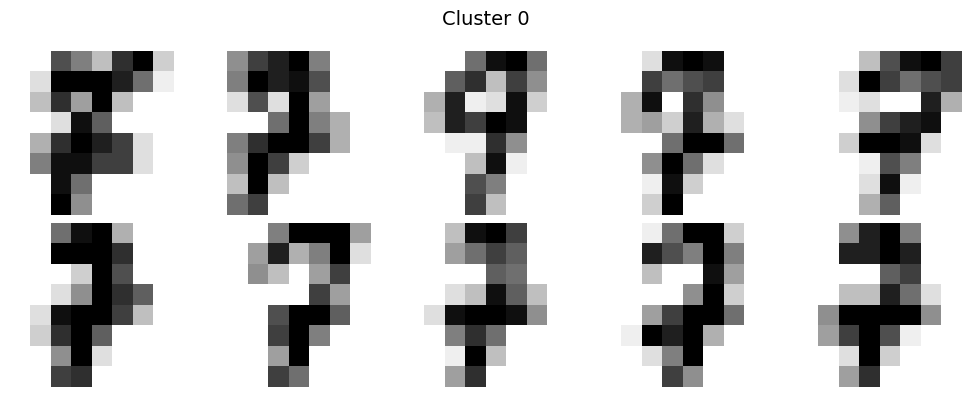

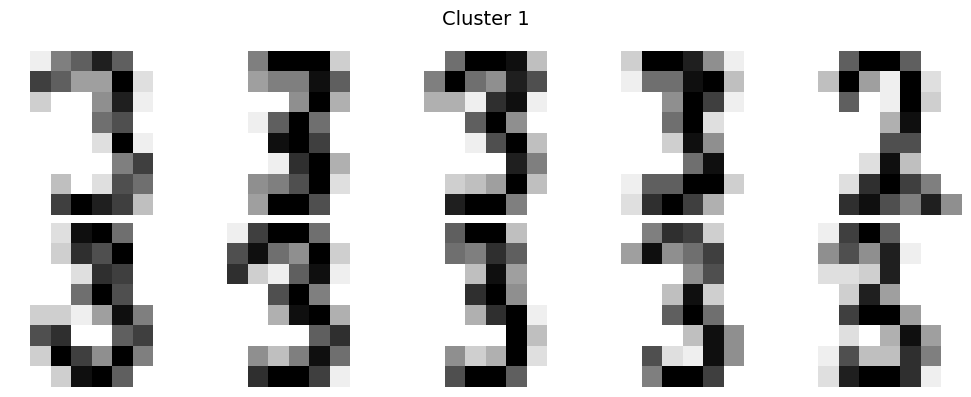

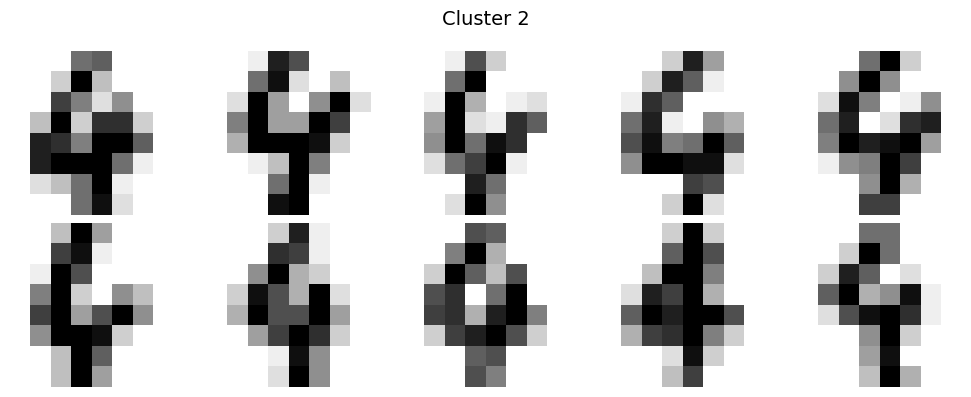

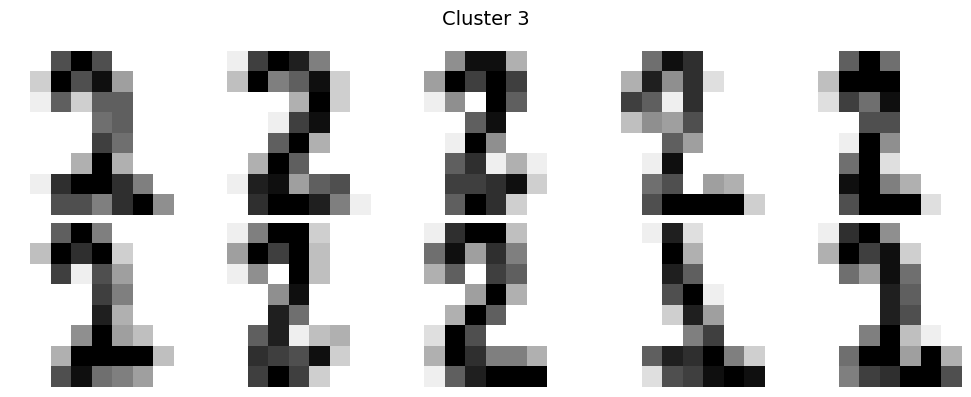

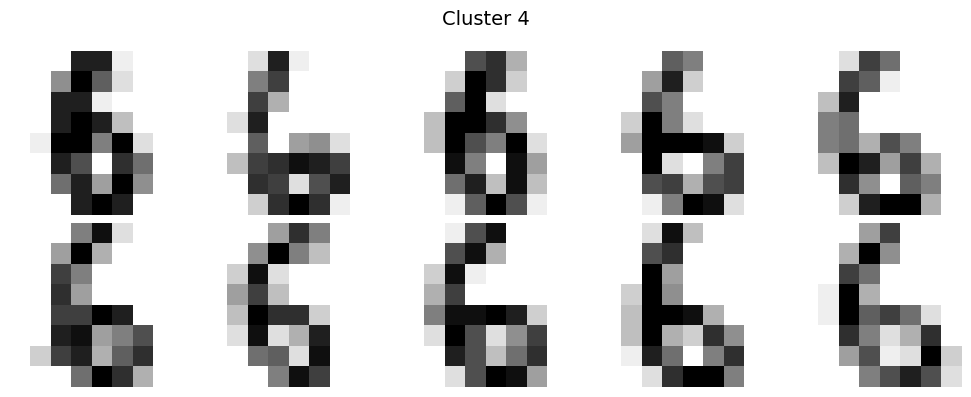

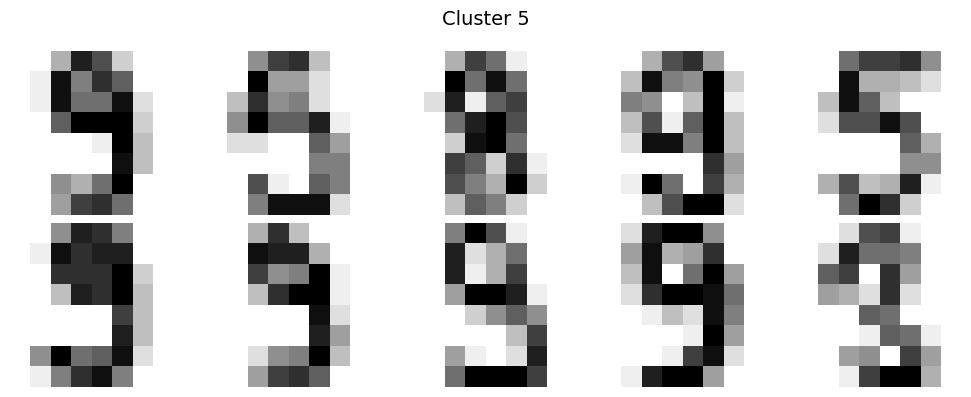

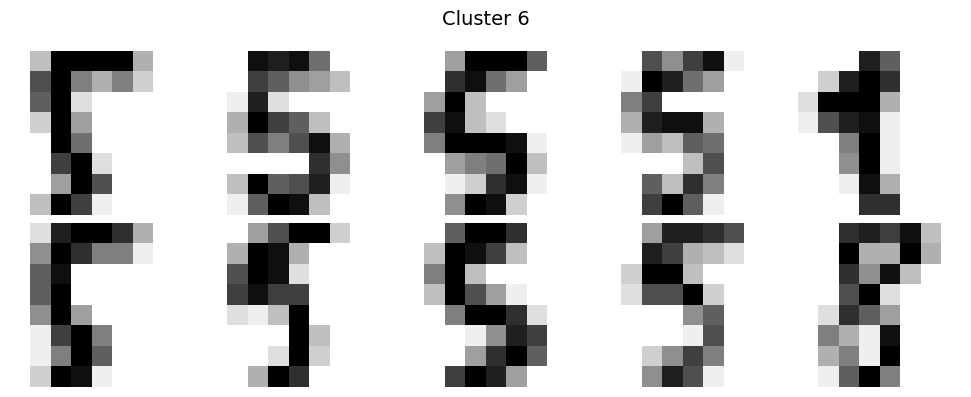

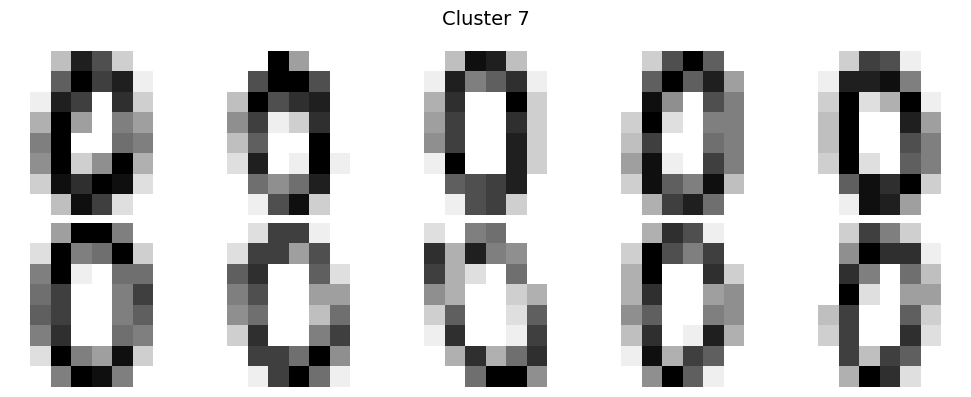

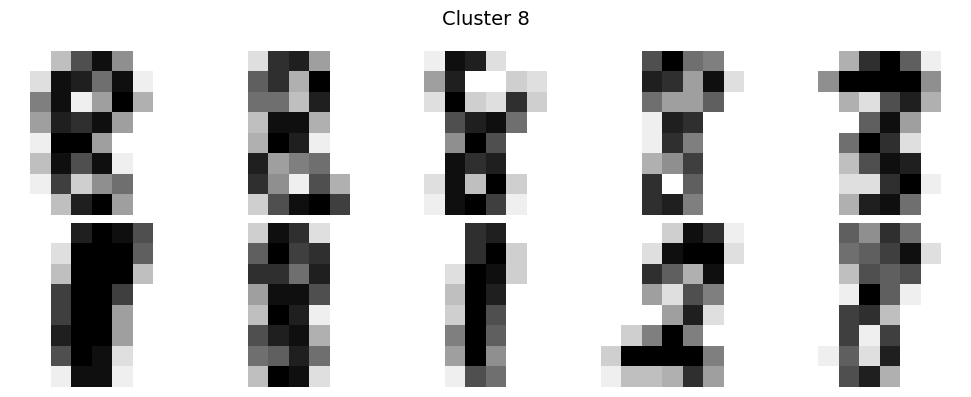

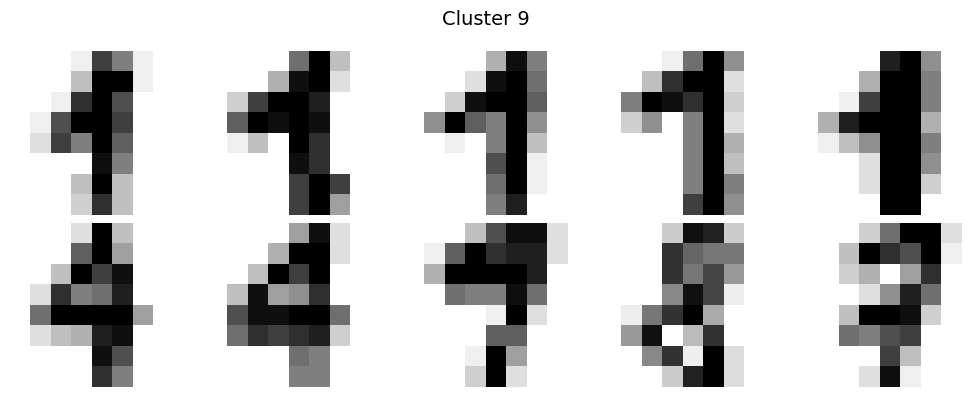

In [7]:
# Create a dictionary to store the images for each cluster
cluster_images = {cluster_label: [] for cluster_label in range(10)}

# Collect the images for each cluster
for image, cluster_label in zip(X_test, y_pred):
    cluster_images[cluster_label].append(image)
# Display the images for each cluster
for cluster_label, images in cluster_images.items():
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Cluster {cluster_label}", fontsize=14)
    
    for i, image in enumerate(images[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

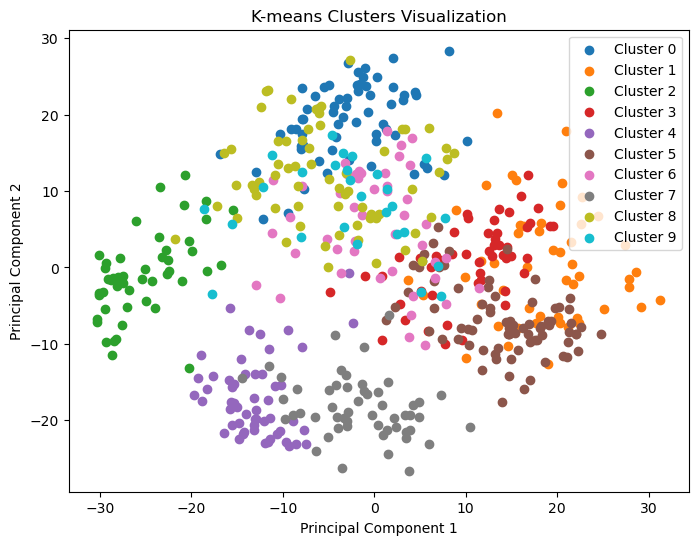

In [8]:
from sklearn.decomposition import PCA
# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a scatter plot of the data points, coloring them by cluster label
plt.figure(figsize=(8, 6))
for cluster_label in range(10):
    cluster_points = X_pca[y_pred == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label}")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters Visualization')
plt.legend()
plt.show()

# KNN Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Create an instance of KNeighborsClassifier with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Perform K-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)  # Change the cv parameter value as desired

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Fit the model to the entire dataset
knn.fit(X, y)

# Predict the labels for the test data
y_pred = knn.predict(X_test)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report)

# Calculate accuracy (if ground truth labels are available)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy:.4f}")

Cross-Validation Scores:
[0.95518207 0.96078431 0.96348315 0.98876404 0.96910112]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      1.00      0.97        55
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        55
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        54
           6       1.00      1.00      1.00        54
           7       1.00      1.00      1.00        53
           8       1.00      0.94      0.97        51
           9       1.00      0.98      0.99        53

    accuracy                           0.99       535
   macro avg       0.99      0.99      0.99       535
weighted avg       0.99      0.99      0.99       535

Accuracy: 0.9925


In [10]:
# Predict the labels for the future prediction data
y_future_pred = knn.predict(X_future)


# Calculate accuracy (if ground truth labels are available) for the future prediction data
accuracy_future = accuracy_score(y_future, y_future_pred)
print(f"Accuracy - Future Prediction: {accuracy_future:.4f}")

Accuracy - Future Prediction: 0.9333


## Visualization

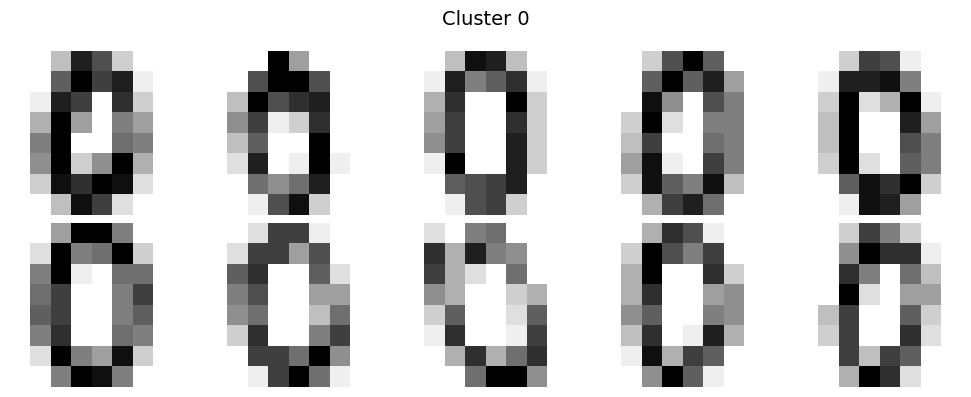

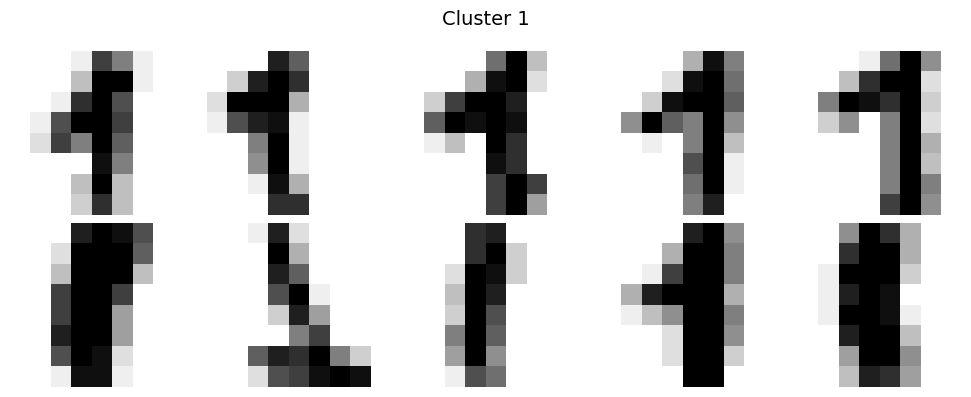

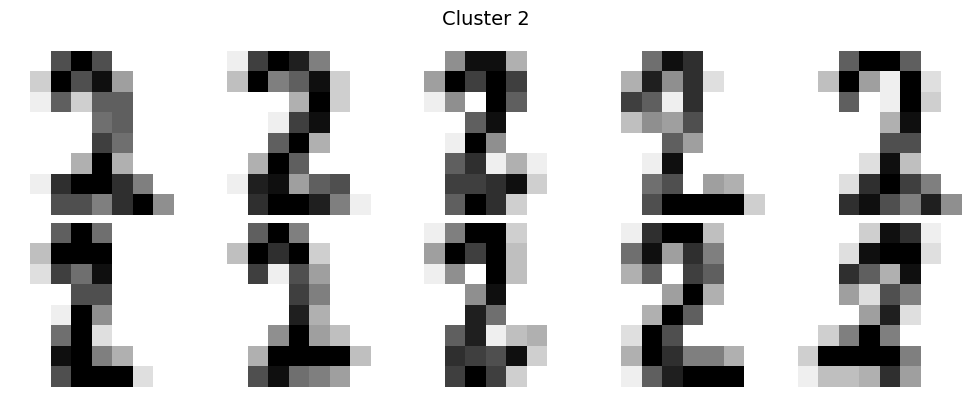

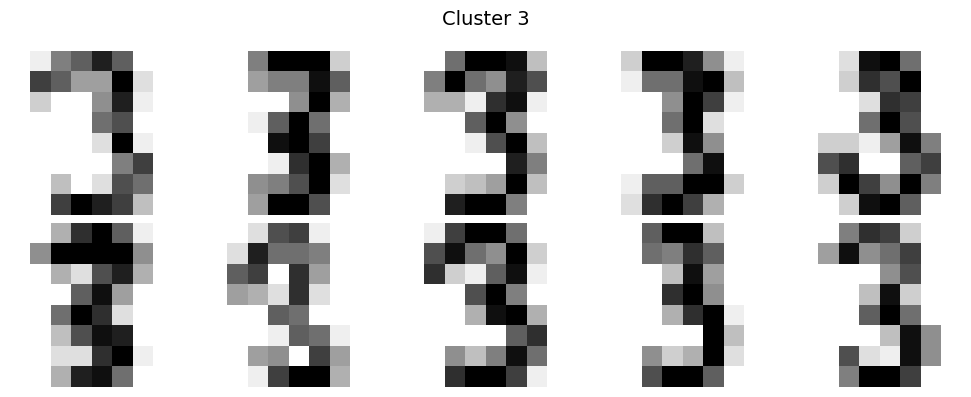

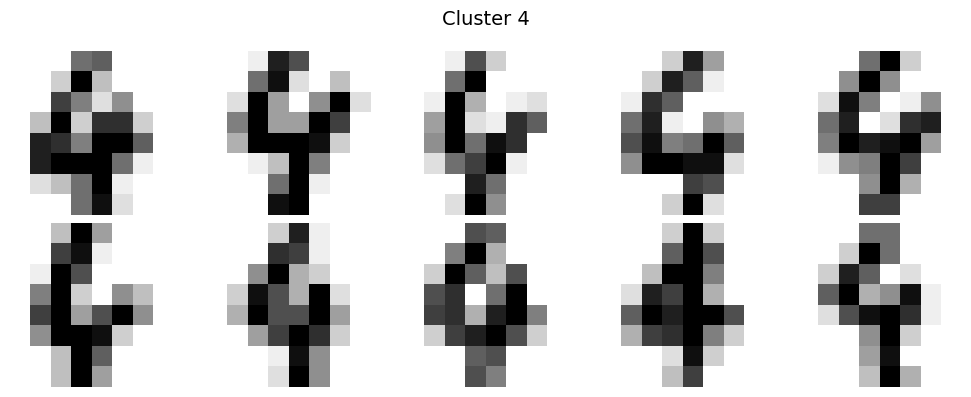

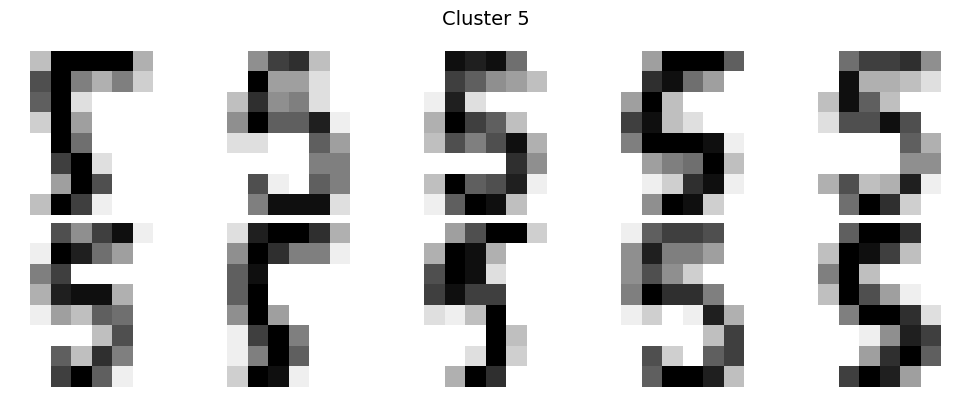

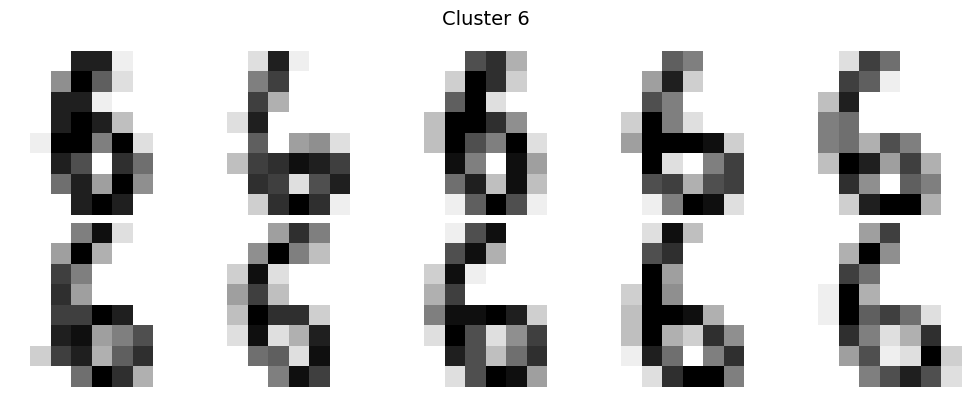

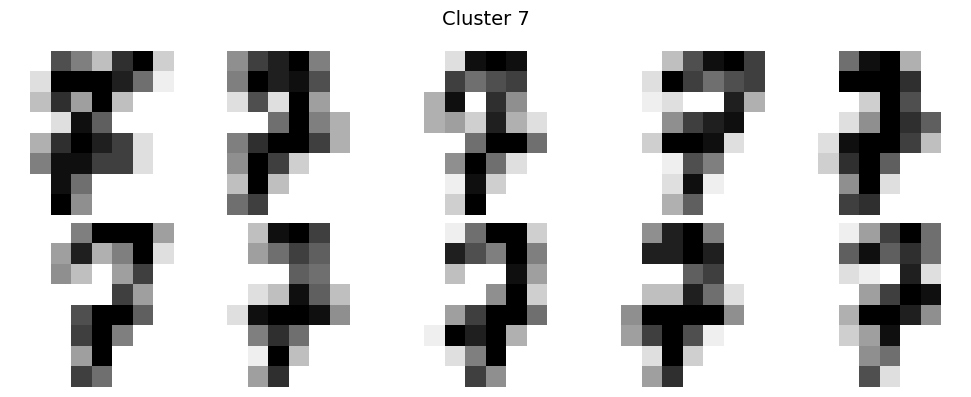

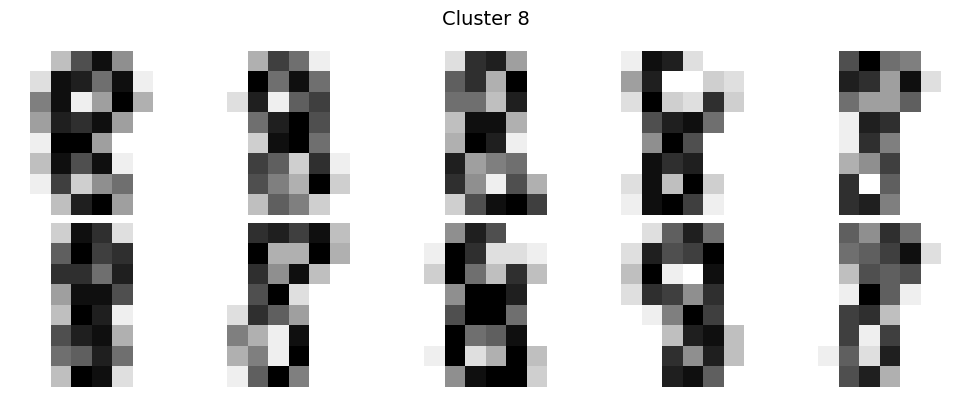

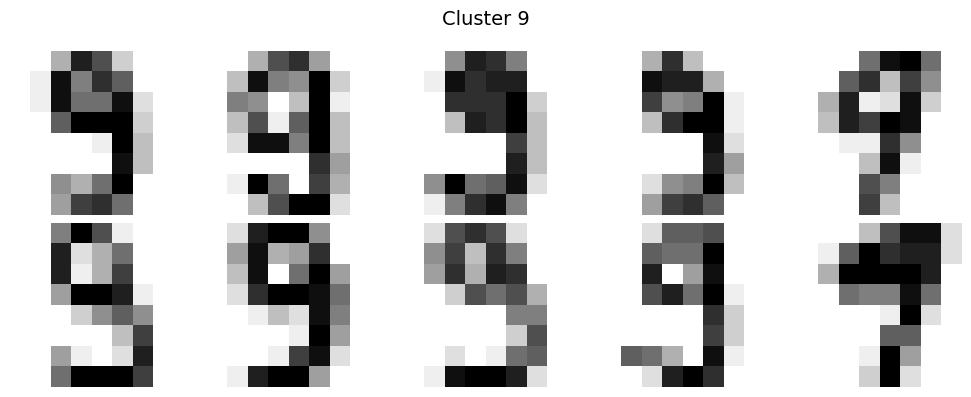

In [11]:
# Create a dictionary to store the images for each cluster
cluster_images = {cluster_label: [] for cluster_label in range(10)}

# Collect the images for each cluster
for image, cluster_label in zip(X_test, y_pred):
    cluster_images[cluster_label].append(image)

# Display the images for each cluster
for cluster_label, images in cluster_images.items():
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Cluster {cluster_label}", fontsize=14)
    
    for i, image in enumerate(images[:10]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

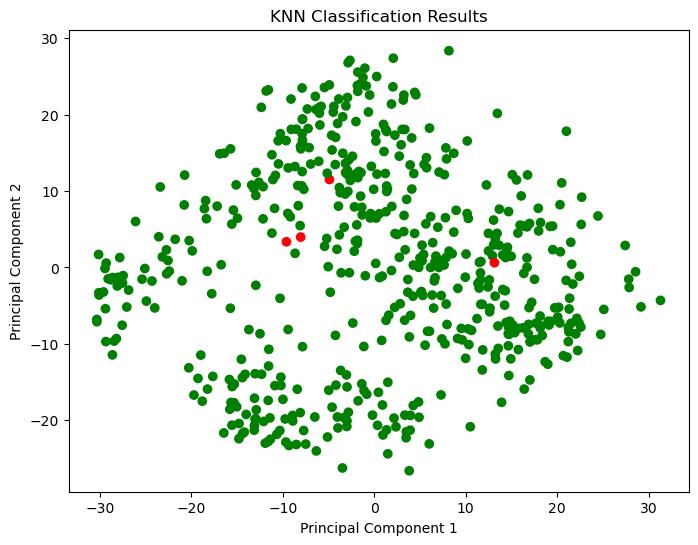

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Create a scatter plot of the data points, coloring them based on prediction correctness
plt.figure(figsize=(8, 6))
colors = ['green' if pred == true_label else 'red' for pred, true_label in zip(y_pred, y_test)]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classification Results')
plt.show()

# Models Comparison 

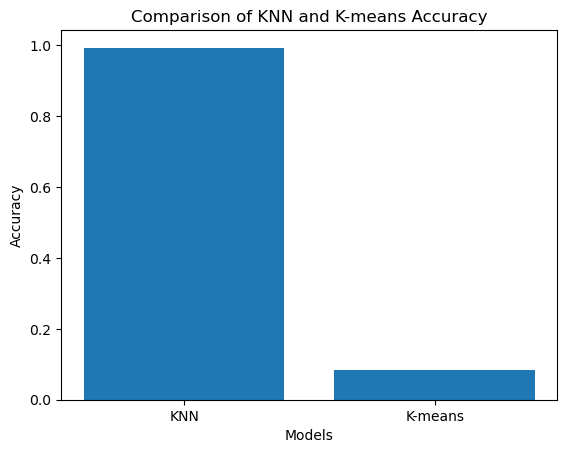

In [13]:
# Bar plot data
models = ['KNN', 'K-means']
accuracy_scores = [knn_accuracy, kmeans_accuracy]

# Plotting the bar graph
plt.bar(models, accuracy_scores)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of KNN and K-means Accuracy')

# Displaying the graph
plt.show()